Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 07 - The Fourier Transform

[1.   Introduction](#section_1)  
[2.   Formal definition](#section_2)  
[3.   Fourier transform of some basic functions](#section_3)  
[3.1. Constant function](#section_31)  
[3.2. Sine and cosine functions](#section_32)  
[4.   Transformation of derivatives](#section_4)  
[5.   Convolution and translation theorems](#section_5)  
[6.   The Fast Fourier Transform (FFT)](#section_6)  
[7.   The spectral density and the periodogram](#section_7)  
[7.1. Definition](#section_71)  
[7.2. Example with a white noise](#section_72)  
[7.3. Example with an accelerometer signal](#section_73)  
[8.   Assignment](#section_8)

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 

In [24]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from   MRPy import MRPy


## 1. Introduction <a name="section_1"></a> 

To understand the _Fourier transform_ we can firstly recall the _Fourier series_ concept, 
according which any _periodic function_ with period $T$ can be expressed as a sum of 
sines and cosines:

$$ f(t) =   a_0 + \sum_{k = 1}^\infty 
           {a_k \, \cos \omega_k t + b_k \, \sin \omega_k t}$$

with $f(t) = f(t + T)$ and $\omega_k = 2k\pi/T$, where:

\begin{align*}
 a_0 &= \frac{1}{T} \int_{-T/2}^{T/2} f(t) \; dt \\ \\
 a_k &= \frac{2}{T} \int_{-T/2}^{T/2} \cos \omega_k t \; f(t) \; dt \\ \\
 b_k &= \frac{2}{T} \int_{-T/2}^{T/2} \sin \omega_k t \; f(t) \; dt
\end{align*}

with $k = 1, 2, \dots\ \infty$.
Recalling that sine and cosine functions have zero mean implies that the 
series coefficient $a_0$ represents the mean value of function $f(t)$.
For example, it can be shown that the Fourier series expansion of a 
_zero mean square wave_ is:

$$ f(t) =   \frac{4}{\pi} \; \sum_{k = 1, 3, 5...}^\infty 
            \frac{1}{k}   \;  \sin \omega_{2k+1} t $$

which can be verified with some few Python lines as follows.
Firstly we define a zero mean square wave with periodicity $T = 1$s:


In [25]:
print(9//2, 9%2)

4 1


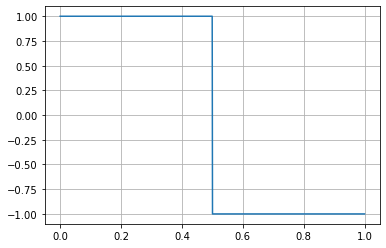

In [26]:
T  =  1           # function periodicity in seconds
N  =  1000        # number of discretization points

t  =  np.linspace(0, T, N)
f1 =  np.zeros(N)

f1[:N//2] = 2.0   # first half period is filled
f1 =   f1 - 1.0   # f1 has zero mean and amplitude one

plt.plot(t,f1)
plt.grid(True)


Then we reconstitutes this same function from Fourier series as given before, but limiting
the infinite summation to only ```Nk``` terms:

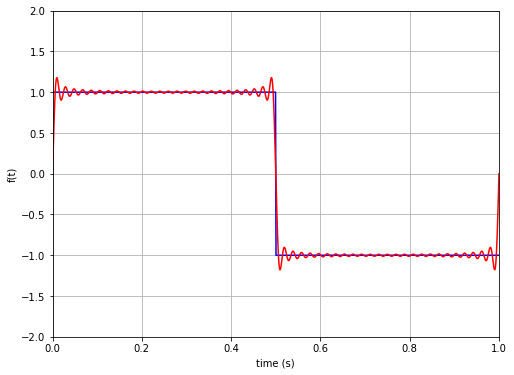

In [33]:
Nk =  51
f2 =  np.zeros(N)

for k in range(1, Nk+1, 2):
    wk   =  2*k*np.pi/T
    f2  +=  np.sin(wk*t)/k

f2 *= 4/np.pi

plt.figure(1, figsize=(8, 6), clear=True)
plt.plot(t, f1, 'b', t, f2, 'r')

plt.xlim( 0, T);  plt.xlabel('time (s)') 
plt.ylim(-2, 2);  plt.ylabel('f(t)') 

plt.grid(True) 


The approximation accuracy can be explored by changing the value assigned to ```Nk``` in
the calculation above. 

It must be emphasized that the series coefficients $a_k$ and $b_k$ hold information about
how to _reconstitutes_ the original function $f(t)$, so they may be seen as _transformed_
functions of variable $\omega_k$ instead of variable $t$.
We will come back later showing how to numerically estimate the Fourier coefficients 
for any periodic function.

Once the Fourier series concept has been understood, the _Fourier transform_ is presented 
in the next section as a extension of the Fourier series concept for $T \rightarrow \infty$.


## 2. Formal definition  <a name="section_2"></a> 

The Fourier series expansion can also be expressed for any real or complex function $f(t)$
by replacing the sine and cosine functions in the previous definition with the 
Euler's formula:

$$ e^{i\omega_k t} = \cos \omega_k t + i \sin \omega_k t$$

what gives:

$$ f(t) =  \sum_{k = -\infty}^\infty {F_k \, e^{i \omega_k t}} $$

where:

$$ F_k = \frac{1}{T} \int_{-T/2}^{T/2} {e^{-i \omega_k t}} \; f(t) \; dt $$

with $ k = 0, \pm 1, \pm 2, \dots\, \pm \infty$.

Now the function periodicity is allowed to increase to infinite to yield the following limits:

\begin{align*}
                               T  &\rightarrow   \infty    \\
      \omega_k = k \Delta \omega  &\rightarrow   \omega    \\
          \Delta \omega = 2\pi/T  &\rightarrow  d\omega
\end{align*}

and also the definition:

$$ \lim_{T \rightarrow \infty} \; \left( T \; F_k  \right)
 = \lim_{\Delta \omega \rightarrow 0} \; \left( \frac{2 \pi} {\Delta \omega} \; F_k \right)
 = F(\omega)$$

which replaced on the series expansion for $f(t)$ gives:

$$ f(t) = \lim_{\Delta \omega \rightarrow 0} \; 
          \left[ \frac{1}{2 \pi} \sum_{k = -\infty}^\infty  e^{i \omega_k t} 
          \left( \frac{2 \pi}{\Delta \omega} \; F_k  \right)
          \Delta \omega \right] $$

and hence:

$$ f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} {e^{i\omega t}\; F(\omega) \; d\omega}
        = \mathscr{F}^{-1} \left\{ F(\omega) \right\} $$

with:

$$ F(\omega) = \int_{-\infty}^{\infty} e^{-i\omega t}\; f(t) \; dt 
             = \mathscr{F}\left\{ f(t) \right\} $$

which are the inverse and the direct _Fourier Transform_ definitions, respectively.
Observing that both integral bounds are infinite, the function $f(t)$ 
must fulfill some special conditions such that the integral convergence
can be ensured.
The most important condition is that the integral of $\left| f(t) \right|$ 
over the complete domain exists:

$$ \exists \int_{-\infty}^{\infty} \left| f(\xi) \right| \; d\xi \in {\mathbb C}$$

although in some special cases the transformation is possible even if this 
condition is not fulfilled.

The transform of a given function and its inverse constitutes a so-called
_transform pair_, usually represented as:

$$ f(t) \Longleftrightarrow F(\omega) $$

While the use of Laplace transforms mostly rely upon _lookup tables_ or CAS 
(_Computer Algebra Systems_), the Fourier transform, both direct and inverse, 
is usually evaluated by means of numerical techniques. 
Nevertheless, some fundamental functions and theorems must receive special 
attention as follows.


## 3. Fourier transform of some basic functions <a name="section_3"></a> 

### 3.1. Constant function <a name="section_31"></a> 

The constant function, $f(t) = c$, does not fulfill the condition for the transform existence
(its integral over the whole domain is infinite), but by assuming that the inverse
transform exists:

$$ c  = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{i\omega t}\; F(\omega) \; dt $$

it can be observed that the only function satifying the integral is the Dirac's Delta:

$$ F(\omega) = 2\pi c \; \delta(\omega) $$

Recalling that the Fourier transform is a linear operator, the function $f(t)$ can be
decomposed as its mean value superposed to a fluctuation:

$$f(t) = \bar{f} + \tilde{f}(t) $$

This implies that, whenever the function has a non-zero mean value, its
Fourier transform will also present an impulse function at the origin, $\omega = 0$.
We will numerically demonstrate this result later on.


### 3.2. Sine and cosine functions <a name="section_32"></a> 

The trigonometric functions $\sin(\omega_0 t)$ and $\cos(\omega_0 t)$ also do not fulfill
the condition for transform existence but, in the same way as for the constant function,
a meaningful transform can be found. 
Observe that a given $\omega_0$ is being used instead of the independent variable $\omega$.

Let us assume that the inverse transform of the Euler's formula exists:

$$ f(t) = e^{i\omega_0 t} = \frac{1}{2 \pi} 
          \int_{-\infty}^{\infty} e^{i\omega t}\; F(\omega) \; dt $$

then again the only function satisfying this integral is the Dirac's Delta at $\omega_0$.

$$ F(\omega) = 2 \pi \; \delta (\omega - \omega_0)$$

By going back from Euler's formula it can be easily demonstrated that for the cosine function
it gives:

$$ \mathscr{F} \left\{ \cos (\omega_0 t) \right\} = 
   \pi \left[ \delta(\omega + \omega_0) + \delta(\omega - \omega_0) \right]$$

and similarly for the sine function:

$$ \mathscr{F} \left\{ \sin (\omega_0 t) \right\} = 
   i\pi \left[ \delta(\omega + \omega_0) - \delta(\omega - \omega_0) \right]$$

These two transforms are depicted below.

<img src="images/Fourier_sine_cosine.png" alt="Heaviside" width="720px"/>

It can be seen that the cosine transform converges to the constant function transform
as the frequency $\omega_0$ goes to zero.
These results will also be demonstrated after we introduce the numerical approach
to the Fourier transform.


## 4. Transformation of derivatives <a name="section_4"></a> 

The transformation of derivatives is essential for using Fourier transform 
for solving differential equations.
The transform of a derivative is expressed as:

$$ \mathscr{F} \left\{ \dot{f}(t) \right\} = 
   \int_{-\infty}^{\infty} e^{-i\omega t} \; \dot{f}(t) \; dt $$

This can be solved through integration by parts by defining:

\begin{array}{ll}
   u  &= e^{-i\omega t}              \hspace{2cm}  &dv = \dot{f}(t) \; dt \\
   du &= -i\omega e^{-i\omega t} dt                &v  = f(t)         
\end{array}

and replacing in:

$$ \int u \; dv = uv - \int v \; du$$

Assuming that the function $f(t)$ may be zero at the far ends of the integration domain
implies that the product $uv$ may be considered to vanish and hence:

$$ \int_{-\infty}^{\infty} e^{-i\omega t} \; \dot{f}(t) \; dt = 
   0 + i\omega \int_{-\infty}^{\infty} e^{-i\omega t} \; f(t) \; dt$$

and hence:

$$ \mathscr{F} \left\{ \dot{f}(t) \right\} = i\omega F(\omega)$$

For solving the dynamic equilibrium equation of linear systems, the second time
derivative of $f(t)$ will also be necessary.
Applying again the derivation rule results:

$$ \mathscr{F} \left\{ \ddot{f}(t) \right\} = -\omega^2 F(\omega) $$

Time derivatives of higher order can be calculated but will not be necessary in the
present context.


## 5. The convolution and translation theorems <a name="section_5"></a> 

The convolution and translation theorems previously presented for Laplace transform
also apply to the Fourier transform.
The convolution reads:

$$ \mathscr{F} \left\{ f(t) * h(t) \right\} = F(\omega) \; H(\omega) $$

with:

$$ f(t) * h(t) = \int_{-\infty}^{\infty} {h(t - \tau}) f(\tau) \,  \; d\tau$$

where we are intentionally changing the notation from $\bar{g}(s)$ and $g(t)$ 
(the unit impulse response function in Laplace Transform theory previously presented) 
to $H(\omega)$ and $h(t)$, which will get a particular meaning in the frequency domain 
analysis with Fourier Transform.

As for the Laplace Transform, the translation in frequency and time domain reads:

$$ \mathscr{F} \left\{ e^{\omega_0 t} f(t) \right\} =  F(\omega - \omega_0) $$

$$ \mathscr{F} \left\{ f(t - \tau) \right\} =  e^{-\omega \tau} \; F(\omega) $$

These theorems will be of little use in this course.


## 6. The Fast Fourier Transform (FFT) <a name="section_6"></a> 

While there is no explicit form for the inverse Laplace transform, it was shown above that
the same does not happen for the Fourier transform.
This means that it can be numerically evaluated in both ways by means of a time and 
frequency domains discretization:

\begin{align*}
\omega_k &= k \left( \frac{2\pi}{T} \right), \;\;\; k = 0, 1, 2, \dots, N-1  \\ \\
     t_j &= j \left( \frac{T}{N} \right),    \;\;\; j = 0, 1, 2, \dots, N-1  
\end{align*}

where $N$ is the length of a time series $f_j = f(t_j)$ with total duration $T$.
The numerical calculation of the direct and inverse transforms are then:

\begin{align*}
F_k &=             \sum_{j=0}^{N-1} {f_j \; \exp\left(-i\omega_k t_j \right)} \\ \\
f_j &= \frac{1}{N} \sum_{k=0}^{N-1} {F_k \; \exp\left( i\omega_k t_j \right)}
\end{align*}

Observe that all the computation above requires $N^2$ evaluations of the 
trigonometric function $\exp\left(i 2\pi k j \right / N)$. 
Recognizing that the multiple permutations of indices $k$ and $i$ could be 
accounted to save computational time inspired the famous FFT algorithm by
[Cooley and Tukey](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm),
which may reduce the number of exponential function evaluations up to $2N$.
This algorithm is now implemented in many digital signal processing programs
and is also available in the ```numpy``` and ```scipy``` modules in Python.

For example, let us calculate the FFT of a constant function, as presented earlier:


In [38]:
N  = 8                    # length of time series
f1 = np.ones(N)           # assigning constant value 1
F  = np.fft.fft(f1)       # calling FFT numpy function from fft submodule
f2 = np.fft.ifft(F)       # inverse transform

np.set_printoptions(precision=3)

print(f1)
print(F.real)
print(F.imag)
print(f2.real)


[1. 1. 1. 1. 1. 1. 1. 1.]
[8. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1.]


what shows that the result is a real impulse function (discrete Dirac's Delta) at the origin.

Let us now take a look at the cosine function:

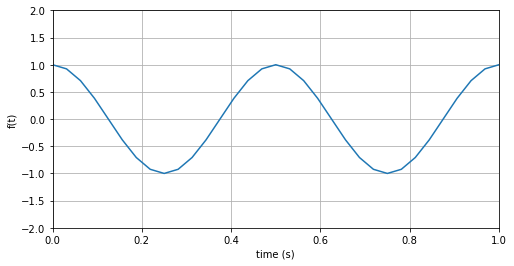

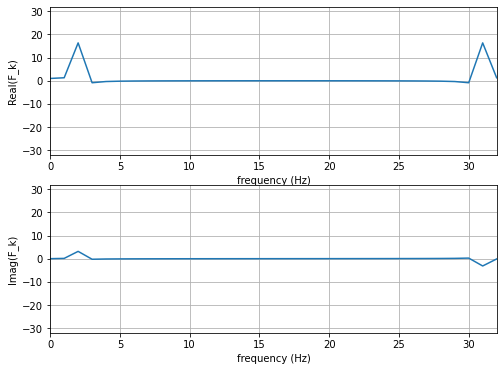

In [45]:
T  = 1                   # series total duration
N  = 32                  # length of time series
f0 = 2                   # sine/cosine frequency (in Hertz)

k  = np.arange(0, N+1)   # required for f_k calculation
ti = k*T/N               # discrete time domain
fk = k/T                 # discrete frequency domain

ci = np.cos(2*np.pi*f0*ti)
Ck = np.fft.fft(ci)

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(ti, ci)
plt.xlim( 0, T);  plt.xlabel('time (s)') 
plt.ylim(-2, 2);  plt.ylabel('f(t)') 
plt.grid(True) 

plt.figure(3, figsize=(8, 6), clear=True)

plt.subplot(2,1,1)
plt.plot(fk, Ck.real)
plt.xlim( 0, N/T);  plt.xlabel('frequency (Hz)')
plt.ylim(-N, N  );  plt.ylabel('Real(F_k)') 
plt.grid(True) 

plt.subplot(2,1,2)
plt.plot(fk, Ck.imag)
plt.xlim( 0, N/T);  plt.xlabel('frequency (Hz)')
plt.ylim(-N, N  );  plt.ylabel('Imag(F_k)') 
plt.grid(True) 


The imaginary part of the result above, which refers to the sine transform,
is a numerical error caused by the coarse representation of the cosine function.
Try increasing the discretization (larger ```N```) and observe what happens.

There are some few important issues to better understand the numerical result above:

1. To get maximum algorithm efficiency, the length $N$ must be a power of 2.
2. The value of $F_k$ for $k = 0$ is zero if $f(t)$ has zero mean (see [constant 
   function](#section_31) above).
3. Since there is no negative time in the numerical transform, the algorithm returns 
   a vector $F_k$ such that its second half is the complex conjugate of the first half.
   This means that the absolute value of $F_k$ is mirrowed at $k = N/2 + 1$.
4. Although the Fourier transform is an extension of the Fourier series concept for
   infinite periodicity, it is very important to keep in mind that the algorithm does
   regard $f_i$ as periodic of length $N$. This can be demonstrated by changing the
   previous example such that the cosine discretization does not respect the due
   cosine periodicity (for instance, set the frequency to 1.5Hz instead of 2Hz).


## 7. The spectral density and the periodogram <a name="section_7"></a>

### 7.1. Definition <a name="section_71"></a>

Given an undamped oscillator with mass $m$ and stifness $k = m\omega^2$, 
subjected to force $F(t)$. The dynamic equilibrium equation is:

$$ \ddot{u} + \omega^2 u = F(t)/m = f(t) $$

Its internal energy, $w(t)$, is given at any moment by the sum of kinectic and 
elastic energies as:

$$ w(t) = \frac{1}{2} m \left[ \, \dot{u}^2 + \omega^2 u^2 \, \right]$$

Recalling now the system solution with the convolution integral:

$$ u(t) = \frac{1}{\omega} \int_{-\infty}^{\infty} { f(\tau) \; 
          \sin \omega_{\rm n}(t - \tau) \; d\tau}$$

and calculating its time derivative with the Leibnitz' rule:

$$ \dot{u}(t) = \int_{-\infty}^{\infty} { f(\tau) \; \cos \omega(t - \tau) \; d\tau}$$

gives that:

$$ w(t) = \frac{1}{2} m \left\{
          \left[ \, \int_{-\infty}^{\infty} { f(\tau) \; \cos \omega(t - \tau) \; d\tau} \right]^2
        + \left[ \, \int_{-\infty}^{\infty} { f(\tau) \; \sin \omega(t - \tau) \; d\tau} \right]^2 
          \right\}  $$ 

Applying the suitable trigonometric relations to $\cos \omega(t - \tau)$ and 
$\sin \omega(t - \tau)$ and doing some algebraic work leads to:

$$ w(t)   \propto 
          \left[ \, \int_{-\infty}^{\infty} { f(\tau) \; \cos \omega\tau \; d\tau} \right]^2
        + \left[ \, \int_{-\infty}^{\infty} { f(\tau) \; \sin \omega\tau \; d\tau} \right]^2 $$ 

By recalling Euler's formula it can be recognized that the right hand side is the 
squared absolute value for the inverse Fourier transform of $F(\omega)$, what means that 
$\left| F(\omega) \right|^2$ is a measure of energy for a physical system subjected to 
excitation $f(t)$.
We call it the _Power Spectral Density_ of $f(t)$, $S_F(\omega)$:

$$ S_F(\omega) \propto \left| F(\omega) \right|^2$$

The missing proportion constant is chosen such that the total area under the spectral density
for $\omega > 0$ matches the variance (squared standard deviation) $\sigma_F^2$ of $f(t)$:

$$ \int_0^{\infty} S_F(\omega) \; d\omega = \sigma_F^2$$

Whenever a time series $f_i$ with length $N$ is available, there are many statistical 
estimators for $S_F(\omega)$. 
The most basic of such estimators is the _periodogram_, directly calculate with the series
FFT.
This estimator is available in the ```MRPy``` module as a class method.


### 7.2. Example with a white noise <a name="section_72"></a>

The following example shows how use the ``MRPy`` module to simulate a (almost) perfect white 
noise, and to how visualize the simulated signal both in time and frequency domain using
the quick visualization methods.


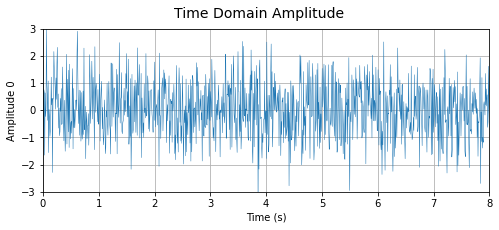

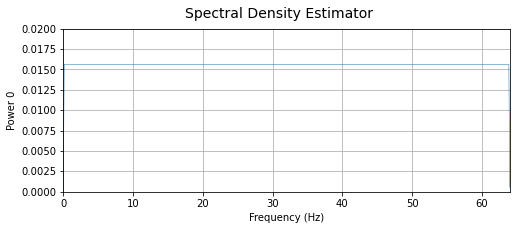

In [49]:
X  = MRPy.white_noise(1, 1024, Td=8)                          # white noise simulation

f1 = X.plot_time(1, figsize=(8,3), axis_t=(0,  8, -3, 3   ))  # plot in time domain
f2 = X.plot_freq(2, figsize=(8,3), axis_f=(0, 64,  0, 0.02))  # plot in frequency domain


0.998082662731733


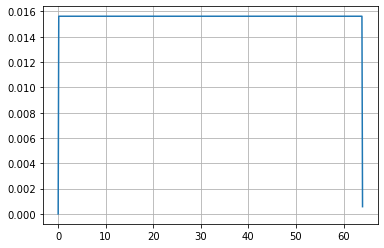

In [57]:
SX, fs = X.periodogram()
f      = X.f_axis()

plt.figure(10)
plt.plot(f, SX[0]);
plt.grid(True)

sX2 = np.trapz(SX[0], f)

print(sX2)


### 7.3. Example with an accelerometer signal <a name="section_73"></a>

This additional example shows how use the ``MRPy`` module to read a file with some
acquired accelerometer signal, and how to visualize the read signal both in time and frequency domain
using manually formatted plots.


In [ ]:
# Reads csv file with accelerometer signal and isolates component a_z

data = MRPy.from_file('resources/data/iNVH001', form='invh').zero_mean()
az   = MRPy(data[2], data.fs)#extract((2.5,5), by='time')
t    = az.t_axis()

plt.figure(4, figsize=(8, 3), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 

# Calls method for periodogram calculation and visualize

Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 3), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 20);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  5);   plt.ylabel('S_az (power)') 

plt.grid(True) 

# Search for frequency associated to peak of spectrum

kf = Saz[0].argmax()
print('Frequency at spectrum peak: {0:5.2f}Hz'.format(f[kf]))


From the plots above it may be concluded that the accelerometer signal has a strong
energy density around 8Hz, what may indicate that the mechanical system presents a
natural vibration frequency close to this value.


## 8. Assignments <a name="section_8"></a> 

1. Utilizar o mesmo registro de celular dos trabalhos anteriores.
2. Importar os dados para a ```MRPy``` e apresentar os periodogramas
   (estimativas das densidades espectrais), verificando qual a frequência
   natural de vibração livre do objeto instrumentado pelo pico do gráfico.
4. Relatório com descrição do objeto, gráficos e resultados (nome do arquivo            T5_xxxxxxxx.ipynb).
